In [1]:
# Standard libraries
import matplotlib.pyplot as plt

# Third-party libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [2]:
covid_data = pd.read_csv('COVID_Data.csv')

covid_data_numeric = covid_data.copy()
for column in covid_data_numeric.columns:
    covid_data_numeric[column] = covid_data_numeric[column].map({'Yes': 1, 'No': 0})

correlation_matrix = covid_data_numeric.corr()

sorted_correlation = correlation_matrix['COVID-19'].sort_values(ascending=False)

sorted_correlation

COVID-19                                   1.000000
Sore throat                                0.502848
Dry Cough                                  0.464292
Abroad travel                              0.443875
Breathing Problem                          0.443764
Attended Large Gathering                   0.390145
Contact with COVID Patient                 0.357122
Fever                                      0.352891
Family working in Public Exposed Places    0.160208
Visited Public Exposed Places              0.119755
Hyper Tension                              0.102575
Asthma                                     0.089930
Diabetes                                   0.040627
Heart Disease                              0.027072
Gastrointestinal                          -0.003367
Running Nose                              -0.005657
Headache                                  -0.027793
Fatigue                                   -0.044188
Chronic Lung Disease                      -0.056837
Wearing Mask

# Logistic Regression Classifier

0.8362967504598406

              precision    recall  f1-score   support

           0       1.00      0.16      0.27       316
           1       0.83      1.00      0.91      1315

    accuracy                           0.84      1631
   macro avg       0.92      0.58      0.59      1631
weighted avg       0.86      0.84      0.78      1631



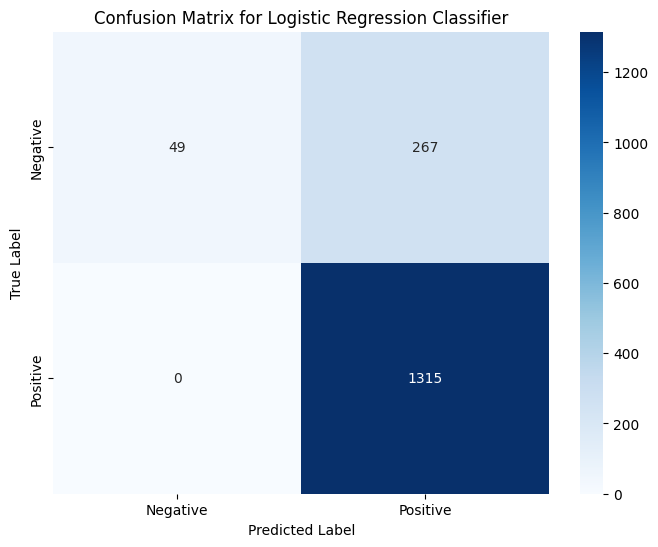

In [3]:
covid_data_numeric = covid_data_numeric.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)

X = covid_data_numeric.drop('COVID-19', axis=1)
y = covid_data_numeric['COVID-19']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LogisticRegression(
    C=0.0001, penalty='l2', fit_intercept=False, solver='lbfgs',
    max_iter=150, class_weight='balanced', random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print("")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


# Random Forest Classifier

0.8773758430410791

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       316
           1       0.96      0.88      0.92      1315

    accuracy                           0.88      1631
   macro avg       0.80      0.87      0.82      1631
weighted avg       0.90      0.88      0.88      1631



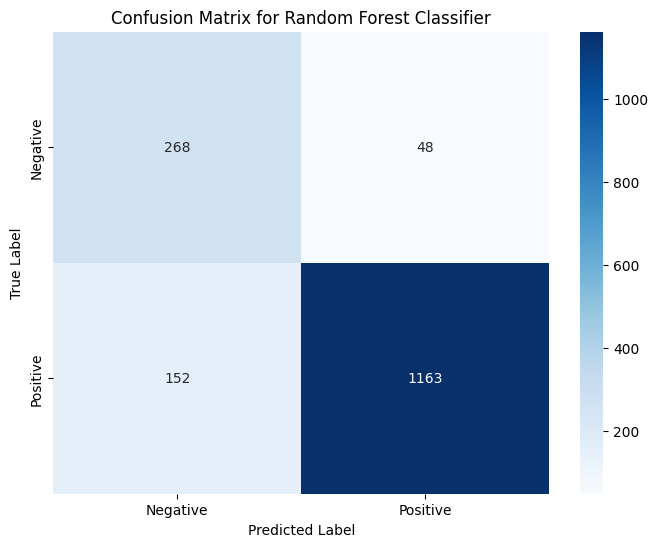

In [4]:
covid_data = pd.read_csv('COVID_Data.csv')
covid_data_numeric = covid_data.copy()
for column in covid_data_numeric.columns:
    covid_data_numeric[column] = covid_data_numeric[column].map({'Yes': 1, 'No': 0})

covid_data_numeric = covid_data_numeric.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)

X = covid_data_numeric.drop('COVID-19', axis=1)
y = covid_data_numeric['COVID-19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=1, min_samples_split=3, class_weight = 'balanced')
rf_clf.fit(X_train, y_train)

rf_y_pred = rf_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_classification_rep = classification_report(y_test, rf_y_pred)

print(rf_accuracy)
print("")
print(rf_classification_rep)

rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


# Decision Tree Classifier

0.8258736971183324

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       316
           1       1.00      0.78      0.88      1315

    accuracy                           0.83      1631
   macro avg       0.76      0.89      0.78      1631
weighted avg       0.91      0.83      0.84      1631



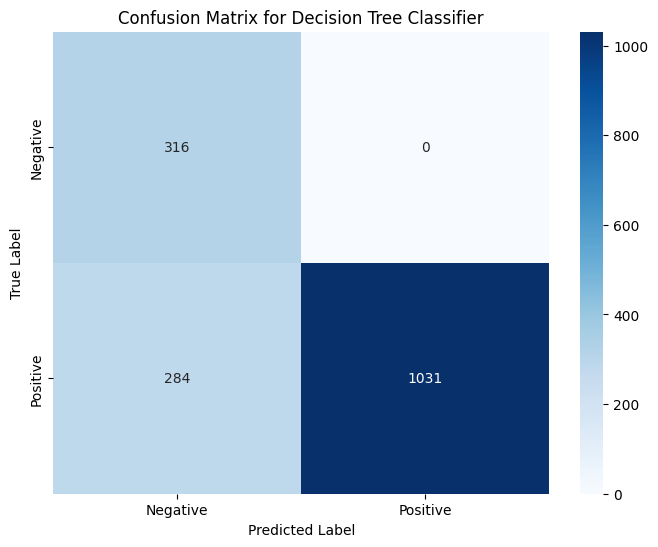

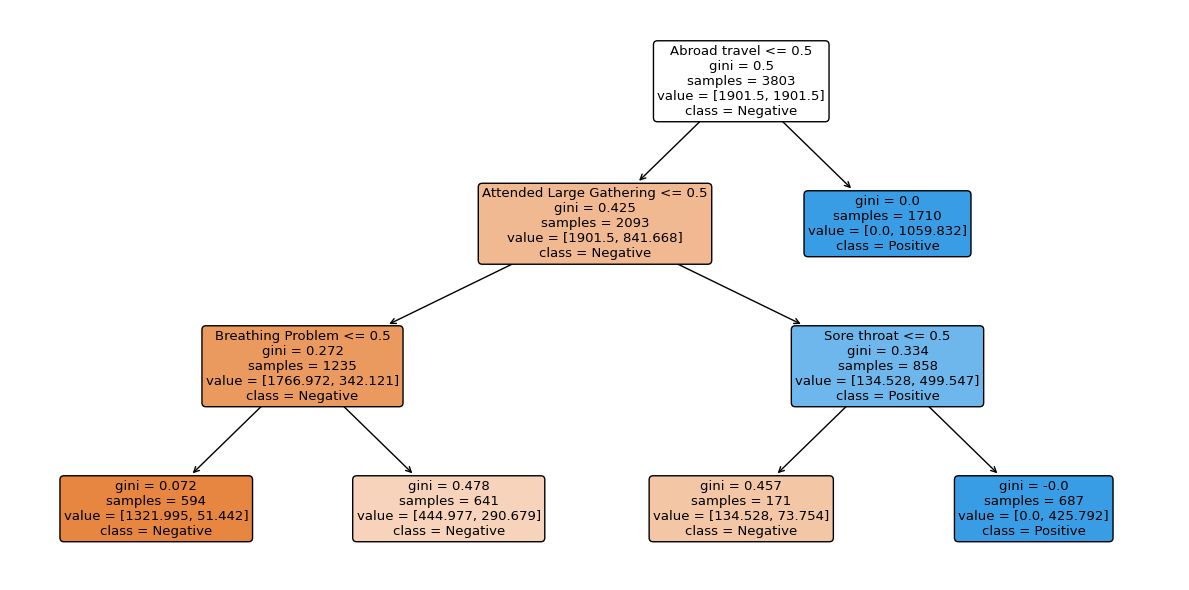

In [5]:
covid_data = pd.read_csv('COVID_Data.csv')
covid_data_numeric = covid_data.copy()
for column in covid_data_numeric.columns:
    covid_data_numeric[column] = covid_data_numeric[column].map({'Yes': 1, 'No': 0})

covid_data_numeric = covid_data_numeric.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)    
    
X = covid_data_numeric.drop('COVID-19', axis=1)
y = covid_data_numeric['COVID-19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced')
dt_clf.fit(X_train, y_train)

dt_y_pred = dt_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_classification_rep = classification_report(y_test, dt_y_pred)

print(dt_accuracy)
print("")
print(dt_classification_rep)

dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

plt.figure(figsize=(12, 6))
plot_tree(dt_clf, feature_names=X.columns.tolist(), class_names=["Negative", "Positive"], filled=True, rounded=True)
plt.tight_layout()
plt.show()

# K-Means Clustering

C:\Users\nolan_fur2pfn\anaconda3\envs\datasciencefinalproject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


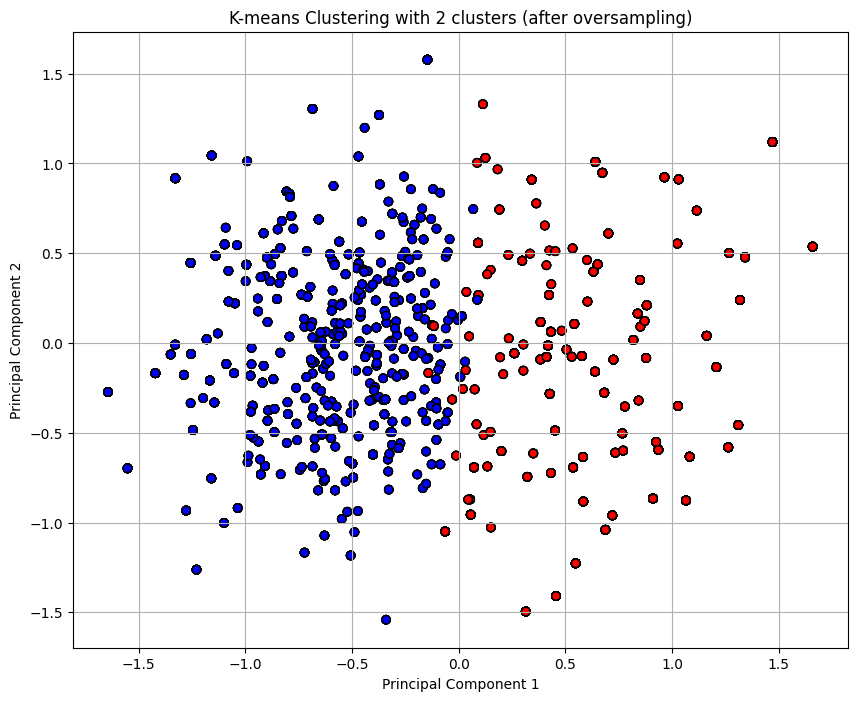

Silhouette Score: 0.11699124236507132


In [6]:
covid_data = pd.read_csv('COVID_Data.csv')
covid_data_numeric = covid_data.copy()
for column in covid_data_numeric.columns:
    covid_data_numeric[column] = covid_data_numeric[column].map({'Yes': 1, 'No': 0})

covid_data_numeric = covid_data_numeric.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)    
    
covid_majority = covid_data_numeric[covid_data_numeric["COVID-19"] == 1]
covid_minority = covid_data_numeric[covid_data_numeric["COVID-19"] == 0]

covid_minority_oversampled = resample(covid_minority, 
                                      replace=True, 
                                      n_samples=len(covid_majority), 
                                      random_state=42)

covid_oversampled = pd.concat([covid_majority, covid_minority_oversampled])

X_oversampled = covid_oversampled.drop('COVID-19', axis=1)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_oversampled)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_oversampled)

colors = ['red' if cluster == 0 else 'blue' for cluster in clusters]

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=colors, marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with 2 clusters (after oversampling)')
plt.grid(True)
plt.show()

silhouette_avg = silhouette_score(X_oversampled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Hierarchical Agglomerative Clustering

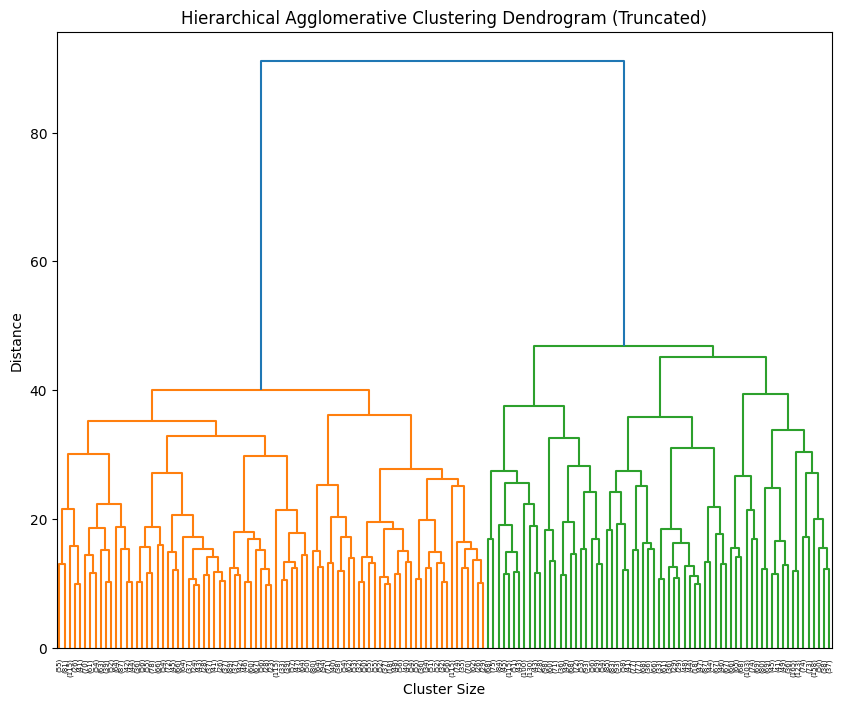

0.110219601535412

In [7]:
covid_data = pd.read_csv('COVID_Data.csv')
covid_data_numeric = covid_data.copy()
for column in covid_data_numeric.columns:
    covid_data_numeric[column] = covid_data_numeric[column].map({'Yes': 1, 'No': 0})
    
covid_data_numeric = covid_data_numeric.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)

covid_majority = covid_data_numeric[covid_data_numeric["COVID-19"] == 1]
covid_minority = covid_data_numeric[covid_data_numeric["COVID-19"] == 0]
covid_minority_oversampled = resample(covid_minority, 
                                      replace=True, 
                                      n_samples=len(covid_majority), 
                                      random_state=42)
covid_oversampled = pd.concat([covid_majority, covid_minority_oversampled])
X_oversampled = covid_oversampled.drop('COVID-19', axis=1)

hac = AgglomerativeClustering(n_clusters=2)
hac_clusters = hac.fit_predict(X_oversampled)

hac_silhouette_avg = silhouette_score(X_oversampled, hac_clusters)

linked = linkage(X_oversampled, method='ward')

plt.figure(figsize=(10, 8))
dendrogram(linked, p=150, truncate_mode='lastp', orientation='top')
plt.title('Hierarchical Agglomerative Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=6000, color='r', linestyle='--')  # Line to show the selected threshold for 2 clusters
plt.show()

hac_silhouette_avg